# Progetto di Business Intelligence per i Servizi Finanziari

Jupyter Notebook relativo alle parti di codice python utilizzate per il progetto.

## 1. Titoli utilizzati in questo progetto
Sono utilizzati i seguenti titoli:

- Tesla, Inc. (TSLA)
- Alphabet Inc. (GOOG)
- Raytheon Technologies Corporation (RTX)
- Lockheed Martin Corporation (LMT)
- Bank of America Corporation (BAC)
- JPMorgan Chase & Co. (JPM)

Importiamo ora i titoli direttamente da Yahoo Finance

In [8]:
# Import delle librerie principali utilizzate per il download dei dati e la loro rappresentazione
import pandas as pd
import numpy as np
import yfinance as yf # per effettuare il download diretto da yahoo finance
import matplotlib.pyplot as plt

# Download dei dati per ogni titolo utilizzato
## titoli tecnologici
tsla_df = yf.download('TSLA', start='2011-11-30', end='2021-11-30')
goog_df = yf.download('GOOG', start='2011-11-30', end='2021-11-30')
## titoli militari
rtx_df = yf.download('RTX', start='2011-11-30', end='2021-11-30')
lmt_df = yf.download('LMT', start='2011-11-30', end='2021-11-30')
## titoli bancari
bac_df = yf.download('BAC', start='2011-11-30', end='2021-11-30')
jpm_df = yf.download('JPM', start='2011-11-30', end='2021-11-30')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## 2. Statistiche descrittive

### 2.a Rendimenti semplici e composti

#### Settore Tecnologico (TSLA e GOOG)

Tabella dei rendimenti semplici Netti e Lordi

In [9]:
# Raggruppamento dei dati con media
tsla_group = tsla_df.groupby(pd.Grouper(freq='M')).mean()
goog_group = goog_df.groupby(pd.Grouper(freq='M')).mean()

tsla_month_returns = tsla_group[['Adj Close']]
goog_month_returns = goog_group[['Adj Close']]
rendimenti_tecno = pd.DataFrame()

# Calcoli dei rendimenti netti e lordi per tsla
rendimenti_netti_tsla = np.log(tsla_month_returns/tsla_month_returns.shift(1))
rendimenti_lordi_tsla = np.log(rendimenti_netti_tsla + 1)

# Calcoli dei rendimenti netti e lordi per goog
rendimenti_netti_goog = np.log(goog_month_returns/goog_month_returns.shift(1))
rendimenti_lordi_goog = np.log(rendimenti_netti_goog + 1)

rendimenti_tecno["Rendimenti Netti Tesla"] = rendimenti_netti_tsla
rendimenti_tecno["Rendimenti Lordi Tesla"] = rendimenti_lordi_tsla
rendimenti_tecno["Rendimenti Netti Alphabet Inc."] = rendimenti_netti_goog
rendimenti_tecno["Rendimenti Lordi Alphabet Inc."] = rendimenti_lordi_goog
rendimenti_tecno = rendimenti_tecno.dropna()

rendimenti_tecno

,Rendimenti Netti Tesla,Rendimenti Lordi Tesla,Rendimenti Netti Alphabet Inc.,Rendimenti Lordi Alphabet Inc.
Date,,,,
2011-12-31,-0.072832,-0.075621,0.059400,0.057702
2012-01-31,-0.086708,-0.090700,-0.020045,-0.020248
2012-02-29,0.175447,0.161648,-0.013908,-0.014005
2012-03-31,0.072938,0.070401,0.033847,0.033286
2012-04-30,-0.050811,-0.052148,-0.012579,-0.012659
...,...,...,...,...
2021-07-31,0.050110,0.048895,0.056498,0.054959
2021-08-31,0.067615,0.065427,0.051407,0.050129
2021-09-30,0.066787,0.064651,0.018219,0.018055


Grafico a Linee dei rendimenti semplici netti

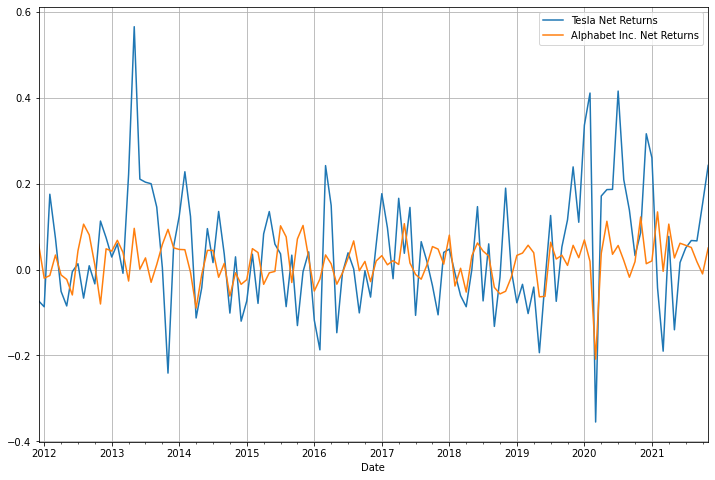

In [11]:
# Plot del grafico con rendimenti netti, utiliziamo plt per indicizzare il grafico
rendimenti_tecno["Rendimenti Netti Tesla"].plot(figsize=(12,8), grid=True, label="Tesla Net Returns")
rendimenti_tecno["Rendimenti Netti Alphabet Inc."].plot(figsize=(12,8), grid=True, label="Alphabet Inc. Net Returns")
plt.legend(loc="upper right")
plt.show()

Tabella dei rendimenti composti

In [12]:
# Rendimenti composti per Tesla (TSLA)
cumul_daily_return_tsla = (1 + rendimenti_netti_tsla).cumprod()
rendimenti_tecno["Rendimenti Composti Tesla"] = cumul_daily_return_tsla

# Rendimenti composti per Alphabet (GOOG)
cumul_daily_return_goog = (1 + rendimenti_netti_goog).cumprod()
rendimenti_tecno["Rendimenti Composti Alphabet"] = cumul_daily_return_goog

# Costruzione tabella con titoli colonne
rendimenti_tecno[["Rendimenti Composti Tesla", "Rendimenti Composti Alphabet"]]

,Rendimenti Composti Tesla,Rendimenti Composti Alphabet
Date,,
2011-12-31,0.927168,1.059400
2012-01-31,0.846775,1.038164
2012-02-29,0.995339,1.023726
2012-03-31,1.067937,1.058376
2012-04-30,1.013673,1.045062
...,...,...
2021-07-31,33.779829,7.603153
2021-08-31,36.063841,7.994008
2021-09-30,38.472421,8.139652


Grafico dei rendimenti composti

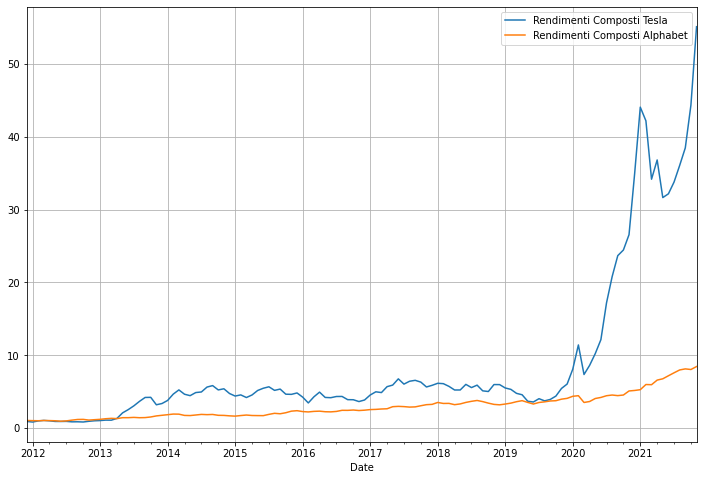

In [15]:
# Plot del grafico dei rendimenti composti, con i rispettivi titoli
rendimenti_tecno[["Rendimenti Composti Tesla", "Rendimenti Composti Alphabet"]].plot(figsize=(12,8), grid=True)
plt.show()